# Import Data

In [27]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("C:/Users/aceme/OneDrive/Documents/GitHub/BP24/Data Creation/Gaussian - small distance/gaussian_small_d_1.tex")

# Creating NumPy array
array = np.array(data)

# Converting to Pandas DataFrame
df = pd.DataFrame(array)

# Look at data
df.head()


,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
0,5.444140,3.835115,3.291091,5.501369,3.428899,4.922020,6.679717,4.207196,5.551717,4.834592,...,5.827100,5.536030,5.505949,3.871041,4.820020,6.893534,4.675085,6.774422,4.013287,1.0
1,4.751552,7.292662,5.983595,6.379493,5.236658,5.765614,5.973641,4.951007,4.739128,5.221459,...,6.917924,6.177616,3.985334,7.088912,6.713774,6.083684,3.632900,4.680444,3.866624,1.0
2,6.271994,6.196881,6.260575,5.059051,7.156964,5.242397,5.938668,6.792579,5.949605,4.961027,...,5.436174,5.076978,5.613830,4.757041,7.940103,5.800670,6.505194,5.033843,8.216384,0.0
3,4.175813,3.704364,3.481604,4.074979,4.708090,5.923180,3.811577,5.946279,5.894935,4.305289,...,3.936844,4.982322,5.583355,3.444634,5.448884,5.031922,5.339520,4.730453,5.299622,1.0
4,5.471645,5.372742,6.487397,5.160722,6.983509,5.484562,8.489674,6.386151,5.103722,6.382228,...,5.699915,4.489785,4.401668,5.614796,6.298538,6.293809,5.578622,6.118113,7.776001,0.0


# Convert 25/150 Columns into NON-CONSECUTIVE Categorical Variables

In [29]:
# Converting 25 columns from numerical floats -> categorical integers
for i in range(0,125,5):
    
    df.iloc[:,i] = df.iloc[:,i].round() # Rounding
    df.iloc[:,i] = df.iloc[:,i].astype(int) # Integer
    df.iloc[:,i] = df.iloc[:,i].astype('category') # Categories
    
# Turn label into categorical label
df.iloc[:,150] = df.iloc[:,150].astype('category')

# Train Test Split

In [31]:
from sklearn.model_selection import train_test_split
# Split dataset into X_train and y_train
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:150], df.iloc[:,-1], test_size=0.2, random_state=52)

# Visualization

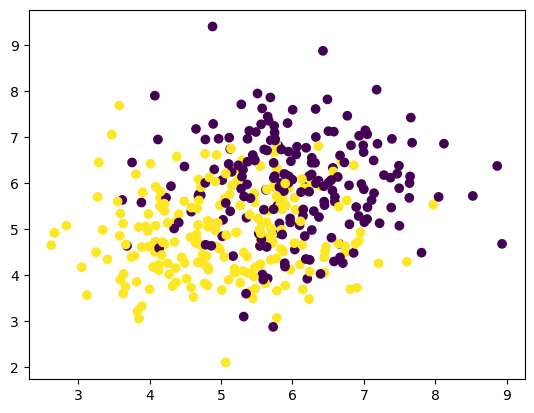

In [33]:
scatter = plt.scatter(X_train.iloc[:,6], X_train.iloc[:,7], c=y_train)

# Edited Function

In [49]:
# -*- coding: utf-8 -*-
"""
Created on Tue Apr 23 13:45:56 2024

@author: cdiet
"""

import pandas as pd
import numpy as np
import random
import sklearn.metrics as skm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.svm import SVC


def betterApplyAugmentationMethods(X_train, method, nrows, nvalues=None, unit=None, noise=None):
    # If nvalues not specified, entire column is selected
    if nvalues is None:
        nvalues = X_train.shape[1] - 1

    if str(method).lower() == 'pmone':
        # Creates empty dataframe to store augmented data
        augmentedDf = pd.DataFrame()

        # Randomly selects rows from data and appends to augmentedDf
        for i in range(nrows):
            augmentedDf = pd.concat([augmentedDf, X_train.iloc[[random.randint(0, X_train.shape[0] - 1)]]],
                                    ignore_index=True)

        # Selects nvalues amount of unique column indexes
        randCols = random.sample(range(0, X_train.shape[1] - 1), nvalues)

        # Iterates through augmentedData and applies plus or minus to randCols indexes
        for i in range(augmentedDf.shape[0]):
            for col in randCols:
                if (random.randint(0, 1) == 0):
                    augmentedDf.iloc[i, col] += unit
                else:
                    augmentedDf.iloc[i, col] -= unit

        return augmentedDf

    elif str(method).lower() == 'modpmone':
        # Creates empty dataframe to store augmented data
        augmentedDf = pd.DataFrame()

        # Randomly selects rows from data and appends to augmentedDf
        for i in range(nrows):
            augmentedDf = pd.concat([augmentedDf, X_train.iloc[[random.randint(0, X_train.shape[0] - 1)]]],
                                    ignore_index=True)

        # Selects nvalues amount of unique column indexes
        randCols = random.sample(range(0, X_train.shape[1] - 1), nvalues)

        # Iterates through augmentedData and applies plus or minus to randCols indexes
        for i in range(augmentedDf.shape[0]):
            for col in randCols:
                colMax = X_train.iloc[:, col].max()
                colMin = X_train.iloc[:, col].min()

                if (augmentedDf.iloc[i, col] + unit < colMax and augmentedDf.iloc[i, col] - unit > colMin):
                    if (random.randint(0, 1) == 0):
                        if (augmentedDf.iloc[i, col] + unit <= colMax):
                            augmentedDf.iloc[i, col] += unit
                        else:
                            augmentedDf.iloc[i, col] -= unit
                    else:
                        if (augmentedDf.iloc[i, col] - unit >= colMin):
                            augmentedDf.iloc[i, col] -= unit
                        else:
                            augmentedDf.iloc[i, col] += unit

        return augmentedDf

    elif str(method).lower() == 'gausnoise':
        # Creates empty dataframe to hold augmented rows
        augmentedDf = pd.DataFrame()

        # Selects random rows from data and appends to augmentedDf
        for i in range(nrows):
            augmentedDf = pd.concat([augmentedDf, X_train.iloc[[random.randint(0, X_train.shape[0] - 1)]]],
                                    ignore_index=True)

        # Selects random unique column index
        randCols = random.sample(range(0, X_train.shape[1] - 1), nvalues)

        # Applies Gaussian noise to randCols values stored in array
        for i in range(augmentedDf.shape[0]):
            for cols in randCols:
                augmentedDf.iloc[i, cols] += np.random.normal(0, noise)

        return augmentedDf

    elif str(method).lower() == 'modgausnoise':
        # Creates an empty dataframe to hold augmented observations
        augmentedDf = pd.DataFrame()

        # Randomly selects unique column indexs from data
        randCols = random.sample(range(0, X_train.shape[1] - 1), nvalues)

        # Appends randomly selected rows from data to augmentedDf
        for i in range(nrows):
            augmentedDf = pd.concat([augmentedDf, X_train.iloc[[random.randint(0, X_train.shape[0] - 1)]]],
                                    ignore_index=True)

        # Generates Gaussian distribution based on columns summary statistics
        # Swaps value with random value in generated Gaussian distribution
        for col in randCols:
            for i in range(augmentedDf.shape[0]):
                mean = augmentedDf[col].mean()
                stDev = augmentedDf[col].std()

                augmentedDf.iloc[i, col] = np.random.normal(mean, stDev)

        return augmentedDf

    elif str(method).lower() == 'randswap':
        # Creates empty dataframe to store augmented rows
        augmentedDf = pd.DataFrame()

        # Copies nrows from original data and appends to augmentedDf
        for i in range(nrows):
            augmentedDf = pd.concat([augmentedDf, X_train.iloc[[random.randint(0, X_train.shape[0] - 1)]]],
                                    ignore_index=True)

        # Picks UNIQUE column indexes to swap
        columnIndexSwaps = random.sample(range(0, X_train.shape[1] - 1), nvalues)

        # Swaps augmentedDf column value from same column in data
        for i in range(augmentedDf.shape[0]):
            for col in columnIndexSwaps:
                randValue = X_train.iloc[random.randint(0, X_train.shape[0] - 1), col]

                augmentedDf.iloc[i, col] = randValue

        return augmentedDf

    else:
        print("Method not found")
        return None


def generateLabels(X_train, Y_train, augmented):
    # import the class
    from sklearn.linear_model import LogisticRegression

    # instantiate the model (using the default parameters)
    # random.seed(1)
    logreg = LogisticRegression(max_iter=10000)

    # fit the model with data

    # print(y_train)
    logreg.fit(X_train, Y_train)

    # create the prediction
    augmented_labels = pd.DataFrame(logreg.predict(augmented))

    Y_train = pd.concat([Y_train, augmented_labels], axis=0, ignore_index=True)

    X_train = pd.concat([X_train, augmented], axis=0, ignore_index=True)

    return X_train, Y_train


def runClassifier(X_train, Y_train, X_test, Y_test, classifier):
    # Creates accuracy table dataframe
    results_df = pd.DataFrame(columns=["Accuracy", "Mean Absolute Error", "Rooted Mean Square Error", "F1 Score"])

    if classifier == "kNN":

        knn = KNeighborsClassifier(n_neighbors=4, weights='distance')

        knn.fit(X_train, Y_train.values.ravel())

        # Predict on dataset which model has not seen before
        predicted_values = knn.predict(X_test)

    elif classifier == "D_tree":
        clf_gini = DecisionTreeClassifier(criterion="gini",
                                          random_state=100, max_depth=3, min_samples_leaf=5)

        clf_gini.fit(X_train, Y_train)

        predicted_values = clf_gini.predict(X_test)


    elif classifier == "Naive_bayes":

        classifier = GaussianNB()
        classifier.fit(X_train, Y_train)

        predicted_values = classifier.predict(X_test)

    elif classifier == "ANN":
        # Performing Feature Scaling
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        # Initializing Artificial Neural Network
        ann = tf.keras.models.Sequential()

        # Adding Hidden Layers
        ann.add(tf.keras.layers.Dense(units=6, activation="relu"))
        ann.add(tf.keras.layers.Dense(units=6, activation="relu"))

        # Adding output layers
        ann.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

        # compiling the Artificial Neural Network
        ann.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

        # Fitting the Artificial Neural Network
        ann.fit(X_train, Y_train, batch_size=32, epochs=100)

        # Generate the predicted labels
        first_predicted_values = ann.predict(X_test)
        second_predicted_labels = first_predicted_values > .5
        final_predicted_labels = second_predicted_labels * 1
        predicted_values = final_predicted_labels

    # SVM
    elif classifier == "SVM":
        # random.seed(1)
        svm = SVC(gamma=2, C=1, kernel='linear', max_iter=1000000, random_state=0)

        # fit the model with data
        # svm.fit(X_train,y_train)
        svm.fit(X_train, Y_train)
        predicted_values = svm.predict(X_test)

        # SVM
    elif classifier == "xgboost":
        # Create model instance
        bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic', enable_categorical=True)
        
        # fit model with the training data
        bst.fit(X_train, y_train)
        
        # make predictions for the test dataset
        predicted_values = bst.predict(X_test)

    else:
        print("Unknown classifier")
        return None

    # Accuracy
    acc = skm.accuracy_score(Y_test, predicted_values)
    mae_accuracy = skm.mean_absolute_error(Y_test, predicted_values)
    rmse_accuracy = skm.root_mean_squared_error(Y_test, predicted_values)
    f1_accuracy = skm.f1_score(Y_test, predicted_values)

    # Appends accuracies to accuracy table
    results_df.loc[1, 'Accuracy'] = acc
    results_df.loc[1, 'Mean Absolute Error'] = mae_accuracy
    results_df.loc[1, 'Rooted Mean Square Error'] = rmse_accuracy
    results_df.loc[1, 'F1 Score'] = f1_accuracy

    return results_df


"""
generatedGaussianDistrubutions Inputs

nrows: Number of rows
ncolumns: Number of columns
median1: First Gaussian distribution median (center)
median2: Second Gaussian distribution median (center)
spread1: First Gaussian distrbiution spread
spread2: Second Gaussian distribution spread

Note:
if label == 0, first Gaussian distribution
if label == 1, second Gaussian distribution
"""


def generateGaussianDistributions(nrows, ncolumns, median1, median2, spread1, spread2):
    # Creates first Gaussian distribution
    label1 = pd.DataFrame(np.random.normal(median1, spread1, size=(int(nrows / 2), ncolumns)))
    # Adds new column for label
    label1['label'] = 0

    # Creates second Gaussian distribution
    label2 = pd.DataFrame(np.random.normal(median2, spread2, size=(int(nrows / 2), ncolumns)))
    # Adds new column for label
    label2['label'] = 1

    # Combines both Gaussian distributions
    df = pd.concat([label1, label2])

    # Shuffles Gaussian distributions
    shuffled_df = pd.DataFrame(np.random.permutation(df))

    return shuffled_df


"""
superFunction applies all methods from the flowchart: augmentation, 
interpretable/uninterpretable classifiers, and accuracy, taking all inputs from
these functions and outputs the accuracy of the augmented data.

Inputs:
    data: A dataframe where the labels are the LAST column
    method: The augmentation method the user wants to use for the data
    nrows: How many output augmentation rows are wanted
    nvalues: The number of values in each row that need to be augmented
    classifier: The classifier the user wants to use
    unit(optional): Only for the pmOne augmentation method and is the unit the 
    augmented data will differ from original data by
    noise(optional): Only for the gausNoise augmentation method and denotes the
    percent by which the augmented data varies from original data


Outputs:
    Returns two dataframes of original and augmented data accuracy measures
"""


def superFunction(data, method, nrows, nvalues, classifier, unit=None, noise=None):
    X = data.drop(data.shape[1] - 1, axis=1)
    Y = data[data.shape[1] - 1]

    # Split into training and test set
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42)

    original_accuracies = runClassifier(X_train, Y_train, X_test, Y_test, classifier)

    # Applies augmentation method to X_train
    augmented = betterApplyAugmentationMethods(X_train, method, nrows, nvalues, unit=unit, noise=noise)

    # Generates labels and concat to X_train and Y_train
    X_train, Y_train = generateLabels(X_train, Y_train, augmented)

    augmented_accuracies = runClassifier(X_train, Y_train, X_test, Y_test, classifier)

    return original_accuracies, augmented_accuracies


df = generateGaussianDistributions(500, 150, 0, 0.25, 1, 1)

# Prints the F1 Score of the augmented data for each augmentation method
# print('pmOne:', superFunction(df, "pmOne", 200, 15, "kNN", unit=0.1)[1]['F1 Score'][1])
# print('randSwap:', superFunction(df, "randSwap", 200, 15, "kNN")[1]['F1 Score'][1])
# print('gausNoise:', superFunction(df, "gausNoise", 200, 15, "kNN", noise=0.1)[1]['F1 Score'][1])
# print('modPmOne:', superFunction(df, "modpmone", 200, 15, "kNN", unit=0.1)[1]['F1 Score'][1])
# print('modGausNoise:', superFunction(df, "modgausnoise", 200, 15, "kNN")[1]['F1 Score'][1])


orig, new = superFunction(df, "pmOne", 200, 15, "kNN", unit=0.1)
print('No Augmentation:', orig['F1 Score'][1])
print('w/ Augmentation:', new['F1 Score'][1])



ModuleNotFoundError: No module named 'tensorflow'

In [37]:
superFunction(data, method='gausnoise', nrows=10, nvalues=10, classifier='xgboost', unit=None, noise=None)

NameError: name 'superFunction' is not defined